In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
# import tensorflow as tf
# from tensorflow.keras.callbacks import EarlyStopping

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
raw = pd.read_csv('../Case Study 7/data/final_project(5).csv')
#raw = pd.read_csv('/content/drive/MyDrive/final_project(5).csv')

In [3]:
raw.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
0,-0.166563,-3.961588,4.621113,2.481908,-1.800135,0.804684,6.718751,-14.789997,-1.040673,-4.204950,...,-1.497117,5.414063,-2.325655,1.674827,-0.264332,60.781427,-7.689696,0.151589,-8.040166,0
1,-0.149894,-0.585676,27.839856,4.152333,6.426802,-2.426943,40.477058,-6.725709,0.896421,0.330165,...,36.292790,4.490915,0.762561,6.526662,1.007927,15.805696,-4.896678,-0.320283,16.719974,0
2,-0.321707,-1.429819,12.251561,6.586874,-5.304647,-11.311090,17.812850,11.060572,5.325880,-2.632984,...,-0.368491,9.088864,-0.689886,-2.731118,0.754200,30.856417,-7.428573,-2.090804,-7.869421,0
3,-0.245594,5.076677,-24.149632,3.637307,6.505811,2.290224,-35.111751,-18.913592,-0.337041,-5.568076,...,15.691546,-7.467775,2.940789,-6.424112,0.419776,-72.424569,5.361375,1.806070,-7.670847,0
4,-0.273366,0.306326,-11.352593,1.676758,2.928441,-0.616824,-16.505817,27.532281,1.199715,-4.309105,...,-13.911297,-5.229937,1.783928,3.957801,-0.096988,-14.085435,-0.208351,-0.894942,15.724742,1


In [4]:
data = raw.copy()

In [6]:
len(data)

160000

Missing Values

In [5]:
# Check na
data.isna().sum().sum()

# Drop na
data.dropna(inplace=True)

In [8]:
data.isna().sum().sum()

0

Duplicates

In [ ]:
# No duplicates
data.duplicated().sum()

0

Unique Values

In [ ]:
single_vals = data.columns[data.eq(data.iloc[0]).all()].tolist()
print(f"There are {len(single_vals)} columns with single values: {single_vals}")
# print(f"Original data dimiension: {data.shape}")
# data.drop(columns=single_vals, inplace=True)
# print(f"Final data dim after dropping aforementioned columns: {data.shape}")
# print(f"There are {df.isna().sum().sum()} NA values and {data.duplicated().sum()} duplicated records")

There are 0 columns with single values: []


Data Types

In [ ]:
data.dtypes

x0     float64
x1     float64
x2     float64
x3     float64
x4     float64
x5     float64
x6     float64
x7     float64
x8     float64
x9     float64
x10    float64
x11    float64
x12    float64
x13    float64
x14    float64
x15    float64
x16    float64
x17    float64
x18    float64
x19    float64
x20    float64
x21    float64
x22    float64
x23    float64
x24     object
x25    float64
x26    float64
x27    float64
x28    float64
x29     object
x30     object
x31    float64
x32     object
x33    float64
x34    float64
x35    float64
x36    float64
x37     object
x38    float64
x39    float64
x40    float64
x41    float64
x42    float64
x43    float64
x44    float64
x45    float64
x46    float64
x47    float64
x48    float64
x49    float64
y        int64
dtype: object

Fix Data formatting

In [6]:
for i in range(len(data)):
    if data['x24'].iloc[i] == 'euorpe':
        data['x24'].iloc[i] = 'europe'

for i in range(len(data)):
    if data['x29'].iloc[i] == 'sept.':
        data['x29'].iloc[i] = 'Sep'
    elif data['x29'].iloc[i] == 'Dev':
        data['x29'].iloc[i] = 'Dec'
    elif data['x29'].iloc[i] == 'January':
        data['x29'].iloc[i] = 'Jan'
    elif data['x29'].iloc[i] == 'July':
        data['x29'].iloc[i] = 'Jul'
    else:
        pass

for i in range(len(data)):
    if data['x30'].iloc[i] == 'thurday':
        data['x30'].iloc[i] = 'thursday'

data['x32'] = list(map(lambda x: x[:-1], data['x32'].values))
data['x32'] = [float(x) for x in data['x32'].values]

data['x37'] = list(map(lambda x: x[1:], data['x37'].values))
data['x37'] = [float(x) for x in data['x37'].values]

/tmp/ipykernel_142588/583479083.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['x24'].iloc[i] = 'europe'
/tmp/ipykernel_142588/583479083.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['x29'].iloc[i] = 'Jul'
/tmp/ipykernel_142588/583479083.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['x29'].iloc[i] = 'Sep'
/tmp/ipykernel_142588/583479083.py:9: SettingWithCopyWarning: 
A value is trying to be set on a cop

Distributions

In [ ]:
df_rep = data.copy()

cleanup= {'x24': {'asia': 1, 'europe': 2, 'america': 3},
'x29': {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12},
'x30': {'monday': 1, 'tuesday': 2, 'wednesday': 3, 'thursday': 4, 'friday': 5}}

In [ ]:
df_rep = df_rep.replace(cleanup)

In [ ]:
# All distributions look normally distributed without outliers
import matplotlib.pyplot as plt

import seaborn as sns
for i in df_rep.columns:
    sns.displot(df_rep[i])

array([[<AxesSubplot: title={'center': 'x0'}>,
        <AxesSubplot: title={'center': 'x1'}>,
        <AxesSubplot: title={'center': 'x2'}>,
        <AxesSubplot: title={'center': 'x3'}>,
        <AxesSubplot: title={'center': 'x4'}>,
        <AxesSubplot: title={'center': 'x5'}>,
        <AxesSubplot: title={'center': 'x6'}>],
       [<AxesSubplot: title={'center': 'x7'}>,
        <AxesSubplot: title={'center': 'x8'}>,
        <AxesSubplot: title={'center': 'x9'}>,
        <AxesSubplot: title={'center': 'x10'}>,
        <AxesSubplot: title={'center': 'x11'}>,
        <AxesSubplot: title={'center': 'x12'}>,
        <AxesSubplot: title={'center': 'x13'}>],
       [<AxesSubplot: title={'center': 'x14'}>,
        <AxesSubplot: title={'center': 'x15'}>,
        <AxesSubplot: title={'center': 'x16'}>,
        <AxesSubplot: title={'center': 'x17'}>,
        <AxesSubplot: title={'center': 'x18'}>,
        <AxesSubplot: title={'center': 'x19'}>,
        <AxesSubplot: title={'center': 'x20'}>],

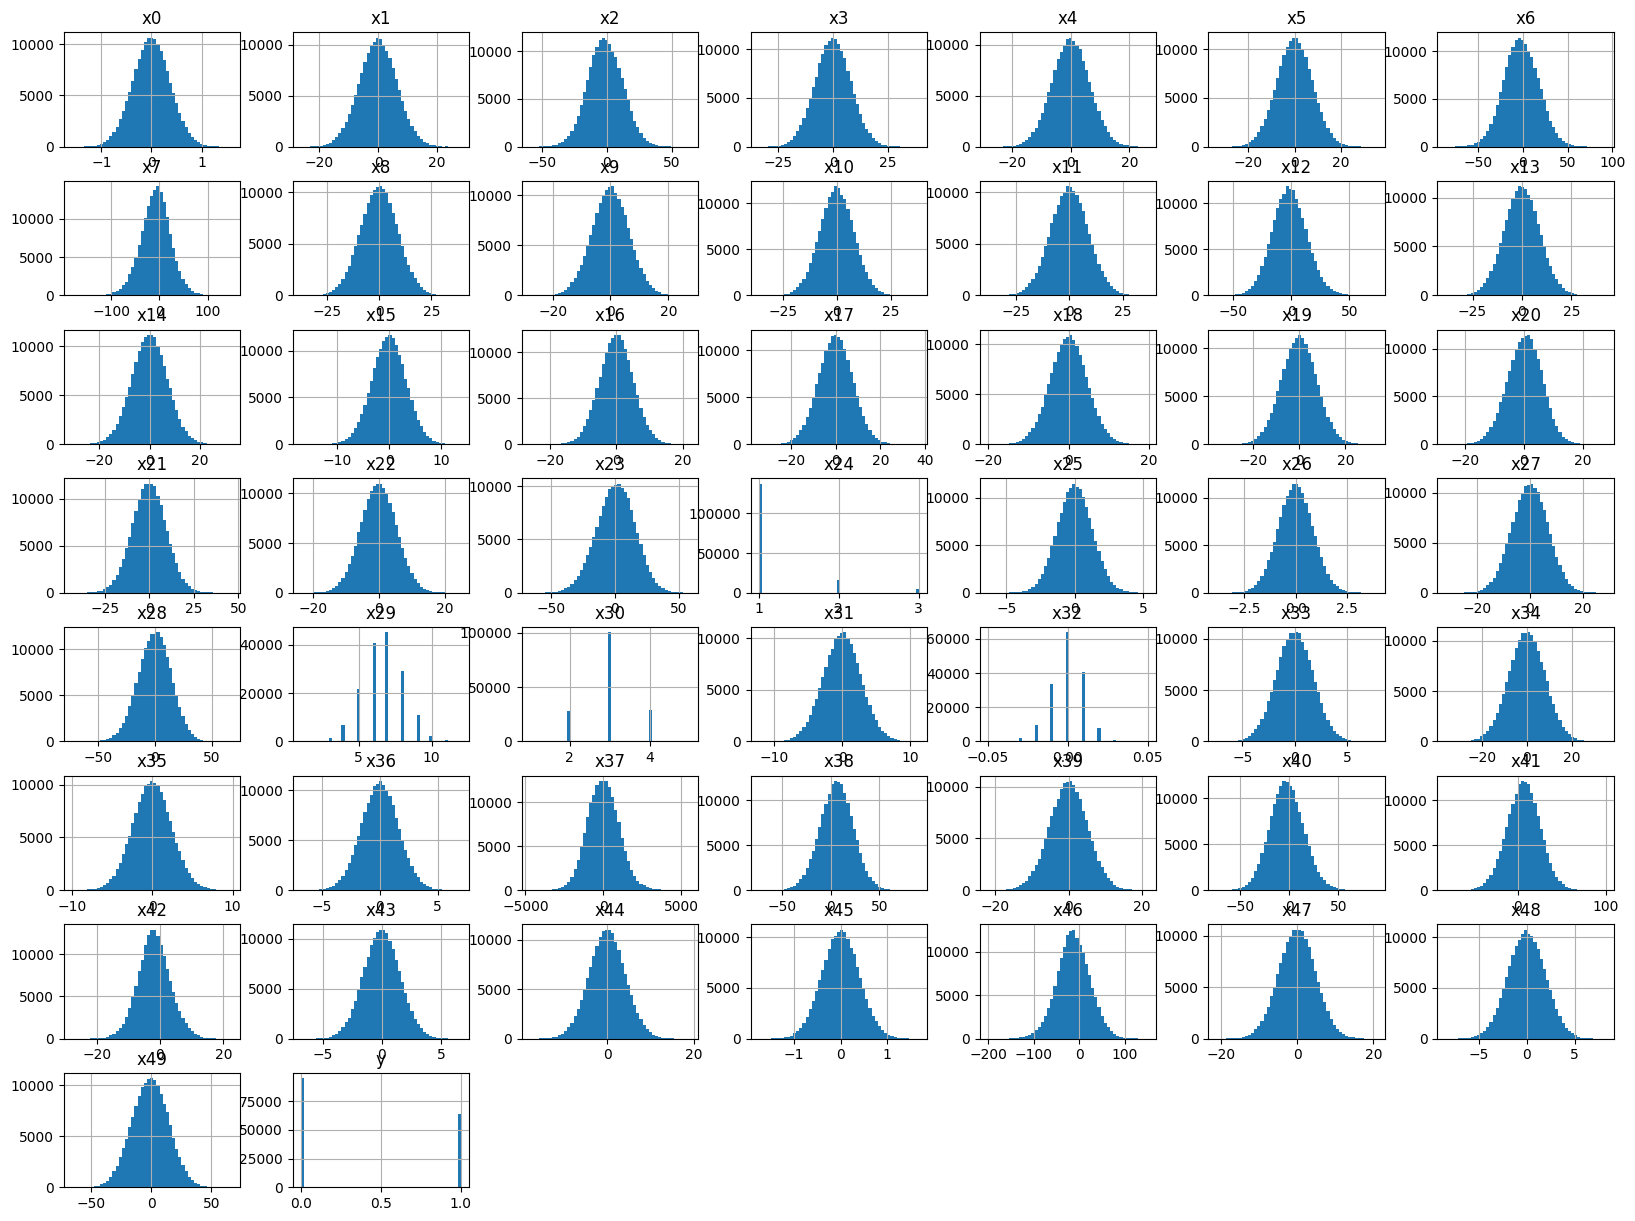

In [ ]:
df_rep.hist(bins=51, figsize=(20, 15))

Could look into outliers, but looks pretty good upon visual inspection from ^^

### PreProcessing

In [7]:
df_ohe = data.copy()

ct = ColumnTransformer([('one-hot-encoder', OneHotEncoder(), ['x24', 'x29', 'x30'])], remainder = 'passthrough')

df_ohe2 = pd.DataFrame(ct.fit_transform(df_ohe))

Split Dataset

In [8]:
from sklearn.model_selection import train_test_split

y = df_ohe2[67]
X = df_ohe2.drop(columns = [67])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

### RandomForest

Baseline

In [ ]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
preds = clf.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, preds)}')
rec = recall_score(y_test,preds)
prec = precision_score(y_test, preds)
print(f'Recall Score: {rec}')
print(f'Precision Score: {prec}')

Accuracy: 0.9196313014931027
Recall Score: 0.8695134534486864
Precision Score: 0.9239267942987265


Randomized Search

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop =2000, num=10)]
max_features = ['sqrt', 'log2']
min_samples_split = [2,5,10]
min_samples_leaf = [1,2,4]
bootsrap = [True, False]

random_grid = {'n_estimators': n_estimators,
                'max_features': max_features,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf,
                'bootstrap': bootsrap}

In [ ]:
clf = RandomForestClassifier()
rf_random= RandomizedSearchCV(estimator = clf, param_distributions = random_grid, n_iter = 10, cv = 3, random_state = 9, n_jobs = 5, verbose = 2)

rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END bootstrap=True, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time= 7.3min
[CV] END bootstrap=True, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time= 7.4min
[CV] END bootstrap=True, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time= 7.5min
[CV] END bootstrap=False, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=600; total time=16.2min
[CV] END bootstrap=False, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=600; total time=16.5min
[CV] END bootstrap=True, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=11.1min


/home/joaquin/Documents/SMU/NLP/homework/.venv/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END bootstrap=True, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=11.3min
[CV] END bootstrap=False, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=600; total time=17.1min
[CV] END bootstrap=True, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=11.2min
[CV] END bootstrap=True, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=15.3min
[CV] END bootstrap=True, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=15.3min
[CV] END bootstrap=False, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time= 9.8min
[CV] END bootstrap=False, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=36.8min
[CV] END bootstrap=False, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=36.2min
[CV] END bootstrap

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=5,
                   param_distributions={'bootstrap': [True, False],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=9, verbose=2)

In [ ]:
rf_random.best_params_

{'n_estimators': 1200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'bootstrap': False}

In [ ]:
best_rs = RandomForestClassifier(n_estimators = 1200, min_samples_split= 2, min_samples_leaf = 1, max_features = 'sqrt', bootstrap = False)
best_rs.fit(X_train, y_train)
rs_preds = best_rs.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, preds)}')
rec = recall_score(y_test,preds)
prec = precision_score(y_test, preds)
print(f'Recall Score: {rec}')
print(f'Precision Score: {prec}')


Accuracy: 0.9196313014931027
Recall Score: 0.8695134534486864
Precision Score: 0.9239267942987265


Grid Search

In [ ]:
params = {'n_estimators': [1200, 1400, 1600],
            'min_samples_split' : [2,3,4],
            'min_samples_leaf' : [1],
            'max_features' : ['sqrt'],
            'bootstrap' : [False]
}

rf_gs = RandomForestClassifier()
clf_gs = GridSearchCV(rf_gs, params, cv = 5, scoring = 'precision', n_jobs = 4)
clf_gs.fit(X_train, y_train)


/home/joaquin/Documents/SMU/NLP/homework/.venv/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [False], 'max_features': ['sqrt'],
                         'min_samples_leaf': [1],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [1200, 1400, 1600]},
             scoring='precision')

In [ ]:
clf_gs.best_params_

{'bootstrap': False,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 1600}

In [ ]:
gs_preds = clf_gs.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, gs_preds)}')
rec = recall_score(y_test,gs_preds)
prec = precision_score(y_test, gs_preds)
print(f'Recall Score: {rec}')
print(f'Precision Score: {prec}')

Accuracy: 0.9292906973073645
Recall Score: 0.8885625843320899
Precision Score: 0.9305128418252847


### Logistic Regression

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
lr = LogisticRegressionCV(random_state=9, cv =5).fit(X_train_scaled, y_train)
lr_preds = lr.predict(X_test_scaled)
print(f'Accuracy: {accuracy_score(y_test, lr_preds)}')
rec = recall_score(y_test,lr_preds)
prec = precision_score(y_test, lr_preds)
print(f'Recall Score: {rec}')
print(f'Precision Score: {prec}')

Accuracy: 0.705483127623978
Recall Score: 0.5228192713707437
Precision Score: 0.665017667844523


In [ ]:
params = {
    'penalty': ['l2', 'l1', 'none', 'elasticnet'],
    'solver': ['liblinear', 'lbfgs', 'sag'],
    'multi_class': ['ovr']
}

lr_rs = LogisticRegression()
clf_rs = GridSearchCV(lr_rs, params, scoring = 'precision', cv = 5, n_jobs = 4, verbose = 2)
clf_rs.fit(X_train_scaled, y_train)
clf_rs.best_params_

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ......multi_class=ovr, penalty=l2, solver=liblinear; total time=   1.6s
[CV] END ......multi_class=ovr, penalty=l2, solver=liblinear; total time=   1.7s
[CV] END ......multi_class=ovr, penalty=l2, solver=liblinear; total time=   1.7s
[CV] END ......multi_class=ovr, penalty=l2, solver=liblinear; total time=   1.7s
[CV] END ..........multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.4s
[CV] END ..........multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.7s
[CV] END ..........multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.7s
[CV] END ..........multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.8s
[CV] END ..........multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.6s
[CV] END ......multi_class=ovr, penalty=l2, solver=liblinear; total time=   1.9s
[CV] END ............multi_class=ovr, penalty=l2, solver=sag; total time=   2.5s
[CV] END ............multi_class=ovr, penalty=l2

/home/joaquin/Documents/SMU/NLP/homework/.venv/lib64/python3.11/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/home/joaquin/Documents/SMU/NLP/homework/.venv/lib64/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/joaquin/Documents/SMU/NLP/homework/.venv/lib64/python3.11/site-packages/sklearn/linear_model/_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^

{'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'lbfgs'}

In [ ]:
lr_preds = clf_rs.predict(X_test_scaled)
print(f'Accuracy: {accuracy_score(y_test, lr_preds)}')
rec = recall_score(y_test,lr_preds)
prec = precision_score(y_test, lr_preds)
print(f'Recall Score: {rec}')
print(f'Precision Score: {prec}')

Accuracy: 0.7055462609299537
Recall Score: 0.5228986427494245
Precision Score: 0.6651186269560828


### Neural Networks

Tf Preprocessing

In [ ]:
data_dum = pd.get_dummies(data, columns = ['x24', 'x29', 'x30'])

y = data_dum['y']
X = data_dum.drop(columns = ['y'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

y_train = tf.one_hot(y_train, depth=2)
y_test_oh = tf.one_hot(y_test, depth=2)

In [23]:
print(X_train_scaled.shape)
print(y_train.shape)

(126713, 67)
(126713, 2)


In [33]:
my_model = tf.keras.Sequential()

my_model.add(tf.keras.Input(shape=(67,)))
my_model.add(tf.keras.layers.Dense(500, activation='sigmoid'))
my_model.add(tf.keras.layers.Dense(400, activation = 'sigmoid'))
my_model.add(tf.keras.layers.Dense(350, activation = 'sigmoid'))
my_model.add(tf.keras.layers.Dense(400, activation = 'sigmoid'))
my_model.add(tf.keras.layers.Dense(2, activation = 'sigmoid'))

my_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[tf.keras.metrics.Precision()])

In [34]:
from tensorflow.keras.callbacks import EarlyStopping
safety = EarlyStopping(monitor = 'val_precision', patience = 3, mode = 'max')

In [35]:
my_model.fit(X_train_scaled, y_train, epochs = 1000, batch_size = 50, validation_data=(X_test_scaled, y_test_oh), callbacks = [safety])

Epoch 1/1000
2535/2535 [==============================] - 11s 4ms/step - loss: 0.4685 - precision: 0.7719 - val_loss: 0.3162 - val_precision: 0.8642
Epoch 2/1000
2535/2535 [==============================] - 9s 4ms/step - loss: 0.2716 - precision: 0.8866 - val_loss: 0.2217 - val_precision: 0.9093
Epoch 3/1000
2535/2535 [==============================] - 9s 4ms/step - loss: 0.1964 - precision: 0.9229 - val_loss: 0.1919 - val_precision: 0.9245
Epoch 4/1000
2535/2535 [==============================] - 9s 4ms/step - loss: 0.1552 - precision: 0.9426 - val_loss: 0.1500 - val_precision: 0.9458
Epoch 5/1000
2535/2535 [==============================] - 9s 4ms/step - loss: 0.1308 - precision: 0.9533 - val_loss: 0.1250 - val_precision: 0.9546
Epoch 6/1000
2535/2535 [==============================] - 9s 4ms/step - loss: 0.1158 - precision: 0.9595 - val_loss: 0.1227 - val_precision: 0.9569
Epoch 7/1000
2535/2535 [==============================] - 9s 4ms/step - loss: 0.1058 - precision: 0.9636 - val_

NN Mini-Ensemble

In [ ]:
#my_model.save('m3_nn.tf')

In [ ]:
keras_model = tf.keras.models.load_model('m1_nn.tf',compile = False)
keras_model._name = 'model1'

keras_model2 = tf.keras.models.load_model('m2_nn.tf',compile = False)
keras_model._name = 'model2'

keras_model3 = tf.keras.models.load_model('m3_nn.tf',compile = False)
keras_model._name = 'model3'

keras_model4 = tf.keras.models.load_model('m4_nn.tf',compile = False)
keras_model._name = 'model4'

In [ ]:
models = [keras_model, keras_model2, keras_model3]
model_input = tf.keras.Input(shape = [67,])
model_outputs = [model(model_input) for model in models]
ensemble_output = tf.keras.layers.Average()(model_outputs)
ensemble_model = tf.keras.Model(inputs = model_input, outputs = ensemble_output)

In [ ]:
ensemble_model.summary()

In [ ]:
preds = ensemble_model.predict(X_test_scaled)
preds_cls_idx = preds.argmax(axis=-1)

In [ ]:
precision_score(y_test, preds_cls_idx)

In [ ]:
# tf method for metrics
pr = tf.keras.metrics.Precision()
pr.update_state(y_test, preds_cls_idx)
print(f'Precision: {pr.result().numpy()}')

#Specificity is the recall of the negative class\n"
print(f'Specificity: {recall_score(y_test, preds_cls_idx, pos_label = 0)}')

In [ ]:
# tf argmax function, same result, just in case the other gives errors later\n"
preds = my_model.predict(X_test_scaled)
preds2 = tf.math.argmax(preds, axis= -1)
preds2

### Ensemble

Load Models

In [ ]:
import pickle
rf1 = pickle.load(open('models/m5_rf.pkl', 'rb'))

In [9]:
ensemble_df = pd.read_csv('ensemble_df.csv', index_col = False)
test_final = pd.read_csv('test_final.csv', index_col = False)

In [12]:
ensemble_df = ensemble_df.drop(columns=['Unnamed: 0'])
test_final = test_final.drop(columns=['Unnamed: 0'])


In [14]:
ensemble_df

,0,xgb
0,0.122500,0.048121
1,0.083854,0.027896
2,0.231354,0.126604
3,0.512396,0.817503
4,0.812812,0.906618
...,...,...
126708,0.956562,0.999486
126709,0.644583,0.855820
126710,0.013542,0.000755
126711,0.683854,0.964268


Random Forest

In [12]:
rf = RandomForestClassifier(n_estimators=1600, min_samples_leaf=1, min_samples_split=4, max_features='sqrt', bootstrap=False, n_jobs = 4)

rf_preds = cross_val_predict(rf, X_train, y_train, cv = 5, method = 'predict_proba', n_jobs = 4)

In [14]:
level2_data = pd.DataFrame(rf_preds[:,1])

In [15]:
level2_data

,0
0,0.122500
1,0.083854
2,0.231354
3,0.512396
4,0.812812
...,...
126708,0.956562
126709,0.644583
126710,0.013542
126711,0.683854


In [17]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, min_samples_split=4, n_estimators=1600,
                       n_jobs=4)

In [18]:
# create level2 df
level2_data = pd.DataFrame(rf_preds[:,1])

# create test values
test_rf = rf.predict_proba(X_test)

XGBoost

In [21]:
import xgboost as xgb

# evallist = [(dtest,'eval'), (dtrain,'train')]\n"
# params = {
#     'objective':'binary:logistic',
#     'eval_metric':'logloss',
#     'eta':.1,
#     'subsample':.8,
#     'min_child_weight':1}

#xgb_model = xgb.train(params=params, dtrain=dtrain, num_boost_round=300, evals=evallist, early_stopping_rounds=1)\n",
xgb_model = xgb.XGBClassifier(objective = 'binary:logistic',min_child_weight=1, subsample=.8, random_state= 9)


In [23]:
xgb_pred = cross_val_predict(xgb_model, X_train, y_train, cv= 5, method = 'predict_proba', n_jobs = 3)

In [25]:
#add xgb column
level2_data['xgb'] = xgb_pred[:,1]

#save level2 df
level2_data.to_csv('ensemble_df.csv')

In [26]:
level2_data.head()

,0,xgb
0,0.122500,0.048121
1,0.083854,0.027896
2,0.231354,0.126604
3,0.512396,0.817503
4,0.812812,0.906618


In [27]:
# create test values for xgb
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=9, ...)

In [28]:
test_xgb = xgb_model.predict_proba(X_test)

#create test df
test_final = pd.DataFrame(test_rf[:,1])
test_final['xgb'] = test_xgb[:,1]

In [30]:
test_final.to_csv('test_final.csv')

In [ ]:
ensemble_df = pd.read_csv('ensemble_df.csv')
ensemble_df = ensemble_df.drop(columns=["Unnamed: 0"])

In [15]:
X_train_ens = ensemble_df.values

Randomized Search for Level 2 Random Forest

In [19]:
clf = RandomForestClassifier()

n_estimators = [int(x) for x in np.linspace(start = 200, stop =2000, num=10)]
max_features = ['sqrt']
min_samples_split = [2,5,10]
min_samples_leaf = [1,2,4]
bootsrap = [True, False]

random_grid = {'n_estimators': n_estimators,
                'max_features': max_features,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf,
                'bootstrap': bootsrap}

rf_xgb_random= RandomizedSearchCV(estimator = clf, param_distributions = random_grid, n_iter = 10, cv = 3, random_state = 9, n_jobs = 5, verbose = 2)

rf_xgb_random.fit(X_train_ens, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END bootstrap=True, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time= 2.9min
[CV] END bootstrap=True, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time= 3.2min
[CV] END bootstrap=True, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time= 3.3min
[CV] END bootstrap=True, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time= 4.0min
[CV] END bootstrap=True, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time= 4.6min
[CV] END bootstrap=True, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time= 4.1min
[CV] END bootstrap=False, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time= 2.5min
[CV] END bootstrap=False, max_features=sqrt, min_samples_leaf=1, min_samples_

/home/joaquin/Documents/SMU/QTW/case_studies/QTW_CaseStudy/.venv/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END bootstrap=True, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1600; total time= 7.2min
[CV] END bootstrap=True, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1600; total time= 7.7min
[CV] END bootstrap=True, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1600; total time= 7.0min
[CV] END bootstrap=True, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time= 8.4min
[CV] END bootstrap=True, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time= 8.6min
[CV] END bootstrap=True, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1600; total time= 7.1min
[CV] END bootstrap=True, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time= 7.8min
[CV] END bootstrap=False, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time= 2.5min
[CV] END bootstr

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=5,
                   param_distributions={'bootstrap': [True, False],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=9, verbose=2)

In [20]:
rf_xgb_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'bootstrap': True}

In [24]:
preds2 = np.where(preds>0.5,1,0)

In [25]:
precision_score(y_test, preds2)

0.9110439210693826

In [21]:
preds = rf_xgb_random.predict(test_final.values)
precision_score(y_test, preds)

0.9110439210693826

Linear Regression

In [16]:
from sklearn.linear_model import LinearRegression
linear_final_oof = LinearRegression()
linear_final_oof.fit(X_train_ens, y_train)

LinearRegression()

In [17]:
oof_preds = linear_final_oof.predict(test_final)

oof_preds2 = np.where(oof_preds > 0.5,1,0)

/home/joaquin/Documents/SMU/QTW/case_studies/QTW_CaseStudy/.venv/lib64/python3.11/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [18]:
precision_score(y_test, oof_preds2)

0.9175